# MOwNiT 

# Laboratorium 5 - Aproksymacja funkcji ciągłej

Niech $\{\phi_0(x),...,\phi_n(x)\}$ będzie rodziną funkcji ciągłych na $[a,b]$ ortogonalną w sensie normy funkcyjnej $\|\cdot\|$.

Aproksymacja funkcji $f$ ciągłej na przedziale $[a,b]$ polega na znalezieniu takiej kombinacji liniowej $\phi(x)=a_0\phi_0(x)+a_1\phi_1(x)+...+a_n\phi_n(x)$ która minimalizuje kwadrat normy $\|\phi-f\|^2$.

Przykładem takiej rodziny jest rodzina jednomianów $\{1,x,x^2,...,x^n\}$ ortogonalna w normie $L^2$ $$\|g\|=\left(\int_a^bg^2(x)dx\right)^{1/2}.$$

## Wielomianowa aproksymacja średniokwadratowa

Celem wielomianowej aproksymacji średniokwadratowej $n$-tego stopnia funkcji $f$ ciągłej na przedziale $[a,b]$ jest znalezienie takiej kombinacji liniowej $W(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_0$ jednomianów $\{1,x,x^2,...,x^n\}$, aby$$\|W-f\|^2=\int_a^b(W(x)-f(x))^2dx$$była minimalna.

Wielomian najlepszej aproksymacji (a raczej jego współczynniki w kolejności od $a_n$ do $a_0$) znajduje funkcja `numpy.polyfit(x, y, deg)`

In [1]:
import numpy as np

#tworzenie punktów aproksymacji
x=np.linspace(0,3,20)
y=np.exp(x)

#wielomiany aproksymacyjne stopni 2,3,4
W2=np.polyfit(x,y,2)
W3=np.polyfit(x,y,3)
W4=np.polyfit(x,y,4)

In [2]:
print(W2,W3,W4)

[ 2.66353717 -2.2955281   1.82584423] [ 0.85441262 -1.18131961  2.20114374  0.84812165] [ 0.20833764 -0.39561322  1.1908604   0.70971996  1.0202036 ]


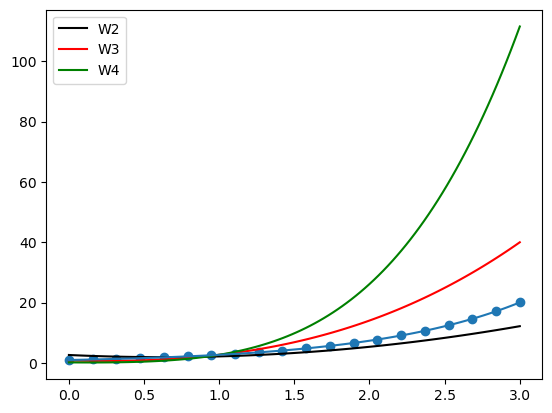

In [3]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

xp=np.linspace(0,3,100)

plt.plot(xp,Polynomial(W2)(xp),'k',label='W2')
plt.plot(xp,Polynomial(W3)(xp),'r',label='W3')
plt.plot(xp,Polynomial(W4)(xp),'g',label='W4')
plt.plot(xp,np.exp(xp))
plt.scatter(x,y)
plt.legend()
plt.show()

## Aproksymacja Czebyszewa

Inną rodziną ortogonalną w normie $L^2$ są *wielomiany Czebyszewa* $T_k(x)$. Definiuje się je rekurencyjnie
$$\begin{aligned}T_{0}(x)&=1,\\T_{1}(x)&=x,\\T_{k+1}(x)&=2x\,T_{k}(x)-T_{k-1}(x)\end{aligned}$$
lub wzorem jawnym
$$T_k(x)=\frac{(x+\sqrt{x^2-1})^k+(x-\sqrt{x^2-1})^k}{2}.$$

Pierwsze kilka wielomianów Czebyszewa:
$$\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{2}(x)&=2x^{2}-1\\T_{3}(x)&=4x^{3}-3x\\T_{4}(x)&=8x^{4}-8x^{2}+1\\T_{5}(x)&=16x^{5}-20x^{3}+5x\end{aligned}$$

Dowolną funkcję $f(x)$ ciągłą na przedziale $[a,b]$ możemy rozwinąć w *szereg Czebyszewa* $$f(x)\approx\sum_{i=0}^\infty c_iT_i(x),$$
a stąd otrzymujemy aproksymację Czebyszewa wielomianem zadanego stopnia $n$ $$f(x)\approx \sum_{i=0}^n c_iT_i(x).$$

W pythonie szereg Czebyszewa otrzymujemy funkcją `numpy.polynomial.chebyshev.Chebyshev(coef)` gdzie `coef` to tablica współczynników $c_i$ w kolejności od $c_0$.

In [4]:
from numpy.polynomial import chebyshev

chebyshev.Chebyshev([1,1,1])

Chebyshev([1., 1., 1.], domain=[-1,  1], window=[-1,  1], symbol='x')

Funkcja `polynomial.chebyshev.cheb2poly(c)` konwertuje szereg na wielomian.

In [5]:
chebyshev.cheb2poly([1,1,1])

array([0., 1., 2.])

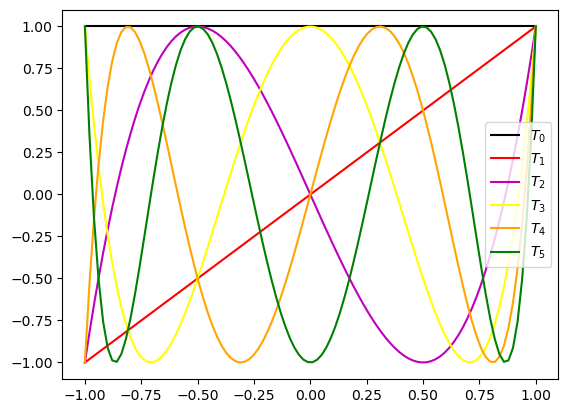

In [6]:
xp=np.linspace(-1,1,100)

plt.plot(xp,Polynomial(chebyshev.cheb2poly([1]))(xp),'k',label='$T_0$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,1]))(xp),'r',label='$T_1$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,1]))(xp),'m',label='$T_2$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,1]))(xp),'yellow',label='$T_3$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,0,1]))(xp),'orange',label='$T_4$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,0,0,1]))(xp),'g',label='$T_5$')
plt.legend()
plt.show()

Współczynniki aproksymacji wielomianami Czebyszewa otrzymujemy funkcją `polynomial.chebyshev.chebfit(x, y, deg)`.

In [7]:
#tworzenie punktów aproksymacji
x=np.linspace(0,3,20)
y=np.exp(x)

#współczynniki aproksymacji wielomianami Czebyszewa
coeff2=chebyshev.chebfit(x,y,2)
coeff3=chebyshev.chebfit(x,y,3)
coeff4=chebyshev.chebfit(x,y,4)
print(coeff2)
print(coeff3)
print(coeff4)

#współczynniki otrzymanych wielomianów aproksymacyjnych
C2=chebyshev.cheb2poly(coeff2)
C3=chebyshev.cheb2poly(coeff3)
C4=chebyshev.cheb2poly(coeff4)
print(C2)
print(C3)
print(C4)

[ 3.15761281 -2.2955281   1.33176858]
[ 0.25746184  2.8419532  -0.59065981  0.21360315]
[ 1.69376041  0.41301005  0.69959902 -0.0989033   0.0260422 ]
[ 1.82584423 -2.2955281   2.66353717]
[ 0.84812165  2.20114374 -1.18131961  0.85441262]
[ 1.0202036   0.70971996  1.1908604  -0.39561322  0.20833764]


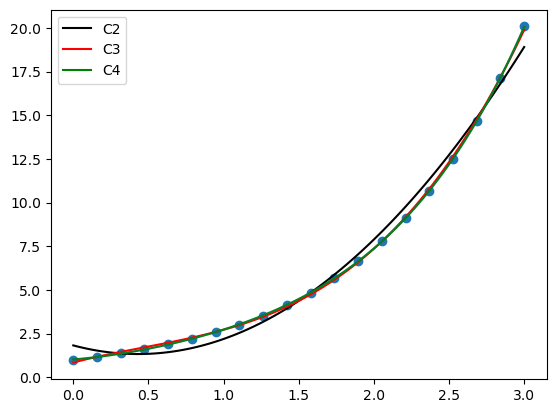

In [8]:
xp=np.linspace(0,3,100)

plt.plot(xp,Polynomial(C2)(xp),'k',label='C2')
plt.plot(xp,Polynomial(C3)(xp),'r',label='C3')
plt.plot(xp,Polynomial(C4)(xp),'g',label='C4')
plt.plot(xp,np.exp(xp),alpha=0.2)
plt.scatter(x,y)
plt.legend()
plt.show()

### Wielomiany Czebyszewa a interpolacja

Okazuje się, że zera wielomianów Czebyszewa, nazywane *węzłami Czebyszewa* są o wiele lepszym zestawem węzłów do interpolacji wielomianowej, niż losowy czy jednostajny wybór węzłów.

Na przedziale $[-1,1]$ węzły Czebyszewa są dane wzorem $$ x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\dots ,n.$$

W dowolnym przedziale $[a,b]$ węzły te mają postać $$x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\dots ,n.$$



### Ćwiczenie 1. (1 pkt)

Porównaj interpolację Lagrange'a funkcji $f(x)=\sin(\pi x)$ na przedziale $[-1,1]$ otrzymaną dla trzech wyborów węzłów interpolacji:
- losowy wybór węzłów
- jednostajny rozkład węzłów na przedziale
- węzły Czebyszewa

Naszkicuj funkcję bazową oraz otrzymane wielomiany interpolacyjne wraz z węzłami interpolacji. Napisz funkcję `ASE(f,W)`, która obliczy przybliżony błąd $\|f-W\|^2$. Oblicz ASE dla każdego wielomianu interpolacyjnego.

In [9]:
# TYPE YOUR CODE BELOW


## Aproksymacja Taylora

Podobnie jak w przypadku Czebyszewa aproksymacja Taylora opiera się na rozwinięciu funkcji gładkiej $f(x)$ w *szereg Taylora* w punckie $a$ $$f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots =\sum _{k=0}^{\infty }{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}.$$

Aproksymację Taylora wielomianem stopnia $n$ otrzymujemy zatem jako $$f(x)\approx \sum _{k=0}^{n }{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}.$$

W pythonie aproksymację Taylora znajdziemy w pakiecie scipy `approximate_taylor_polynomial(f, x, degree, scale)`, gdzie `f` to funkcja aproksymowana, `x` to punkt rozwinięcia, `degree` to stopień wielomianu, `scale` to szerokość przedziału, na którym obliczany jest wielomian aproksymacyjny.

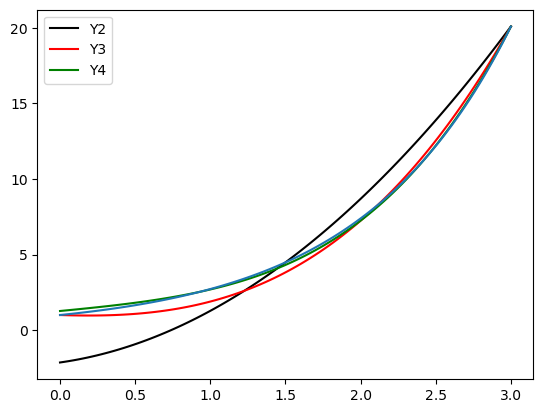

In [30]:
from scipy.interpolate import approximate_taylor_polynomial

Y2=approximate_taylor_polynomial(np.exp,0,2,3)
Y3=approximate_taylor_polynomial(np.exp,0,3,3)
Y4=approximate_taylor_polynomial(np.exp,0,4,3)


xp=np.linspace(0,3,100)

plt.plot(xp,Y2(xp),'k',label='Y2')
plt.plot(xp,Y3(xp),'r',label='Y3')
plt.plot(xp,Y4(xp),'g',label='Y4')
plt.plot(xp,np.exp(xp))
plt.legend()
plt.show()

### Aproksymacja Pade ze współczynników Taylora

Mając współczynniki szeregu Taylora (lub wielomianu aproksymacji Taylora) możemy szybko otrzymać aproksymację wymierną Pade w postaci $\frac{p(x)}{q(x)}$ za pomocą funkcji `scipy.interpolate.pade(an, m, n)`, gdzie `an` to współczynniki Taylora w kolejności od wyrazu wolnego, `m` to zadany stopień licznika `p(x)` a opcjonalne `n` to stopień mianownika `q(x)`.

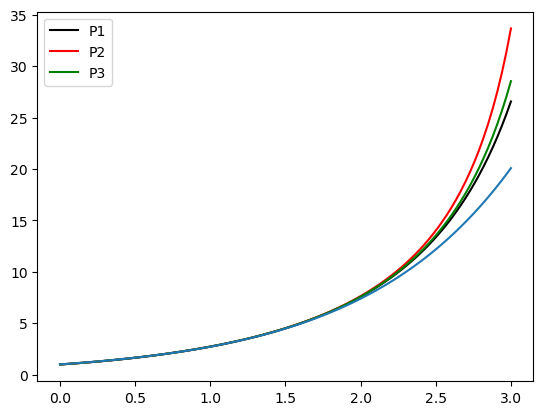

In [38]:
from scipy.interpolate import pade

Y6=approximate_taylor_polynomial(np.exp,0,6,3)

P1=pade(Y6.coefficients[::-1],1)
P2=pade(Y6.coefficients[::-1],2)
P3=pade(Y6.coefficients[::-1],3)

xp=np.linspace(0,3,100)

plt.plot(xp,(P1[0](xp))/(P1[1](xp)),'k',label='P1')
plt.plot(xp,(P2[0](xp))/(P2[1](xp)),'r',label='P2')
plt.plot(xp,(P3[0](xp))/(P3[1](xp)),'g',label='P3')
plt.plot(xp,np.exp(xp))
plt.legend()
plt.show()

### Ćwiczenie 2. (2 pkt)

Porównaj poznane metody aproksymacji na przykładzie funkcji $f(x)=\sin(\pi x)$ na przedziale $[-1,1]$. Dobierz samodzielnie stopień wielomianów. Porównaj otrzymane wielomiany na jednym wykresie. Korzystając z funkcji z ćwiczenia 1 oblicz ASE dla każdego z otrzymanych wielomianów aproksymacyjnych.

In [12]:
# TYPE YOUR CODE BELOW


### Ćwiczenie 3. (2 pkt)

1. Zaimplementuj naiwny algorytm mnożenia macierzy kwadratowych. Dla coraz większych rozmiarów macierzy zmierz czas działania Twojego algorytmu oraz czas działania mnożenia `A.dot(B)` z `numpy`.
2. Dla obydwu algorytmów znajdź dowolną metodą wielomiany aproksymacyjne odpowiednich stopni najlepiej przybliżające krzywą czasu działania w zależności od rozmiaru macierzy.
3. Naszkicuj otrzymane wielomiany wraz z punktami aproksymacji.
4. Sprawdź, czy stopnie otrzymanych wielomianów są zgodne z teoretyczną złożonością badanych algorytmów. 


In [13]:
# TYPE YOUR CODE BELOW
